In [1]:
import warnings

# Disable warnings
warnings.filterwarnings("ignore")


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Reshape the input data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Split the data into training and validation sets
x_train,x_test, y_train, y_test, = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [4]:
# The training set contains 60,000 images and labels
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

Training set shape: (42000, 784)
Training labels shape: (42000,)


In [5]:
from sklearn.tree import DecisionTreeClassifier

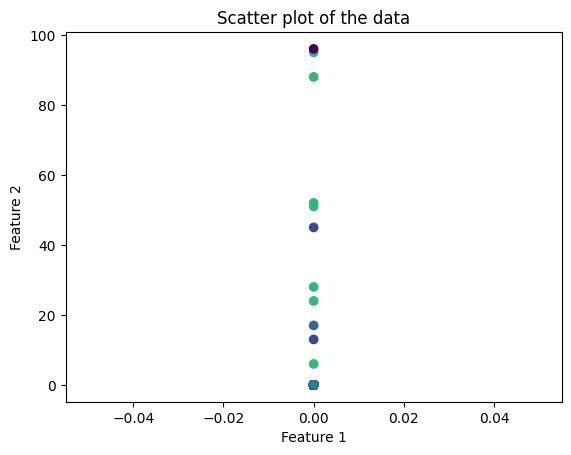

In [6]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(x_train[:, 0], x_train[:, 88], c=y_train)

# Add axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the data')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a linear SVM classifier
svm = SVC(kernel='linear', C=1)

# Fit the classifier to the training data
svm.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [16]:
# Define the values for min_samples_split, max_leaf_nodes, and ccp_alpha
min_samples_split_value = 10
max_leaf_nodes_value = 50
ccp_alpha_value = 0.01

# Train the model
clf_entropy = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=min_samples_split_value, max_leaf_nodes=max_leaf_nodes_value, ccp_alpha=ccp_alpha_value, random_state=22)
clf_entropy.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_leaf_nodes=50,
                       min_samples_split=10, random_state=22)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
